In [10]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
def func(x):
    return x**3 - 6*x**2 - 15*x + 10

def func_derivative(x):
        return 3*x**2 - 12*x - 15

In [12]:
x = np.linspace(-5, 10, 150)

In [24]:
def descent_and_plot(X_start=10, learning_rate=0.01, threshold=0.0001):
    X_start = X_start
    learning_rate = learning_rate
    threshold = threshold
    
    X_next = X_start - learning_rate * func_derivative(X_start)
    
    plt.plot(x, func(x), alpha=0.5)
    
    plt.scatter([X_start, X_next],
                [func(X_start), func(X_next)],
                color='green',
                s=30)
    
    plt.plot([X_start, X_next],
                [func(X_start), func(X_next)],
                color='red')
    
    plt.ylabel('f')
    plt.xlabel('x')
    
    
    while(abs(X_start - X_next) > threshold):
        X_start = X_next
        
        X_next = X_start - learning_rate * func_derivative(X_start)
        
        #print(f"X_start = {X_start};  X_next = {X_next}")
        
        plt.scatter([X_start, X_next],
                [func(X_start), func(X_next)],
                color='green',
                s=30)
    
        plt.plot([X_start, X_next],
                [func(X_start), func(X_next)],
                color='red')
    print(f'Найденная точка в конце градиентного спуска это X={X_next}')

Найденная точка в конце градиентного спуска это X=4.999584029924965


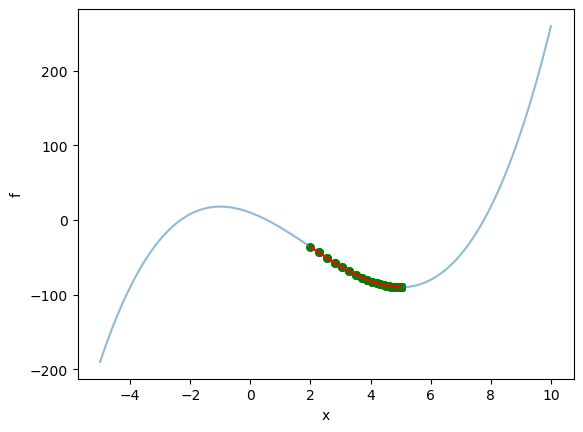

In [25]:
descent_and_plot(2)

In [ ]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples
        
        self.targets = targets
        self.learning_rate = learning_rate
        self.threshold = threshold
        
        self.beta = np.ones(self.samples.shape[1])
        self.iteration_num = 0
        self.iteration_loss_dict = {}
        
    def add_constant_feature(self):
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        self.samples['КОНСТАНТА'] = 1
        self.beta = np.append(self.beta, 1)
        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели : float
        """
        loss = np.dot(self.samples, self.beta) - self.targets.values
        
        return np.mean(loss**2)

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной : np.ndarray
        """
        ### Your code is here
    
    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        ### Your code is here
        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| >= threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Записываем новые mse -> next_mse
            Пока |(previous_mse) - (next_mse)| >= threshold:
                Повторяем первые 3 шага
        """
        ### Your code is here